# SQL Practice from analystbuilder 

# Business Problem: 

Often when you're working with customer information you'll want to sell that data to a third party. Sometimes it is illegal to give away sensitive information such as a full name.

Here you are given a table that contains a customer ID and their full name.

Return the customer ID with only the first name of each customer.

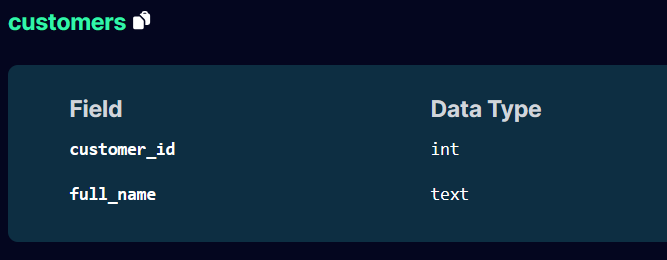

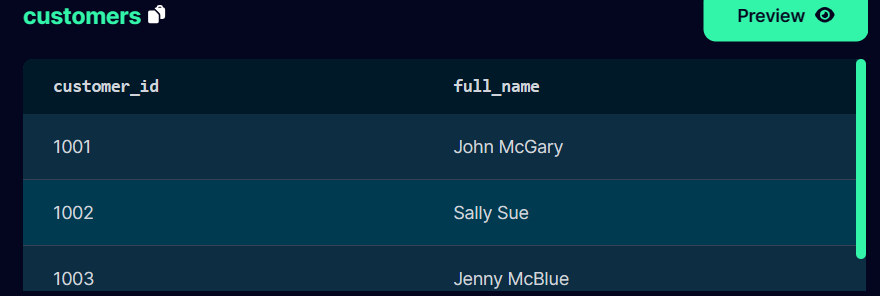

In [ ]:
-- The customers table provide the customer_id and full_name. I will use a substring to seperate the first name from the last name to protect the customer's sensitive information.

SELECT customer_id,
  SUBSTRING_INDEX(full_name, ' ', 1) AS first_name
FROM customers;

**Learned how to use substring_index to separate first and last name from a column that combined a customer's full name**

# Business Problem

**Direct Reports**

Write a query to determine how many direct reports each Manager has.

Note: Managers will have "Manager" in their title.

Report the Manager ID, Manager Title, and the number of direct reports in your output.


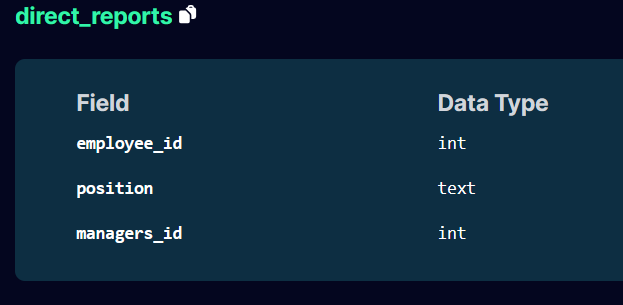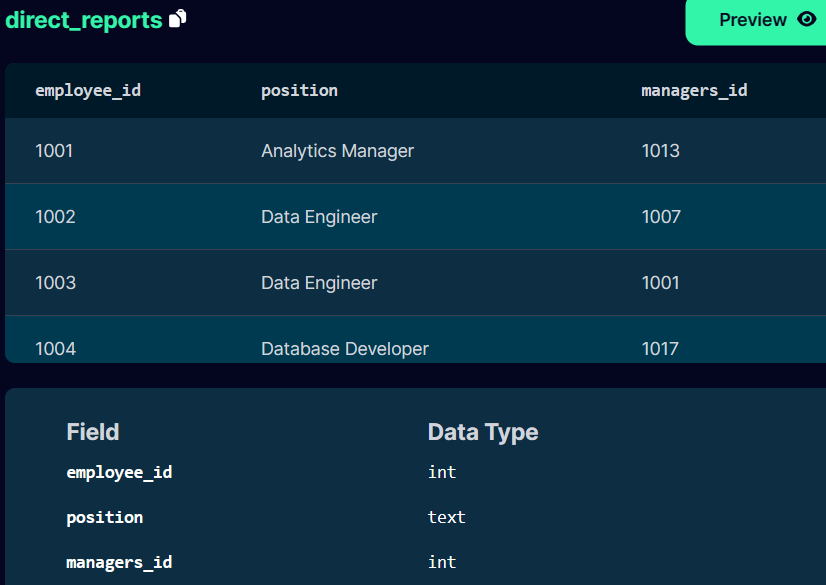

In [ ]:
-- Wrote a query using a self join to find the number of employees reporting an employee with a manager title.
SELECT dr2.employee_id as manager_id, dr2.position as manager_title,
  COUNT(dr1.employee_id) as direct_reports
FROM direct_reports dr1
  JOIN direct_reports dr2
  ON dr1.managers_id = dr2.employee_id
WHERE dr2.position LIKE '%Manager%'
GROUP BY manager_id, manager_title;

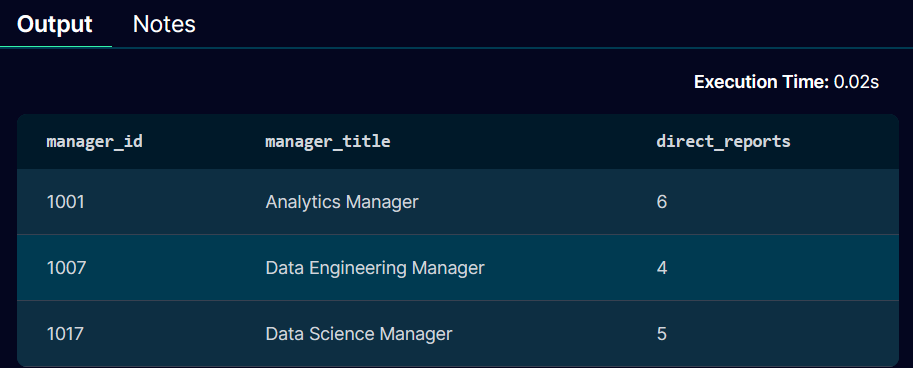

**Learned how write a query using a self join**

# Business Problem

**Bike Price**

Sarah's Bike Shop sells a lot of bikes and wants to know what the average sale price is of her bikes.

She sometimes gives away a bike for free for a charity event and if she does she leaves the price of the bike as blank, but marks it sold.

Write a query to show her the average sale price of bikes for only bikes that were sold, and not donated.

Round answer to 2 decimal places.

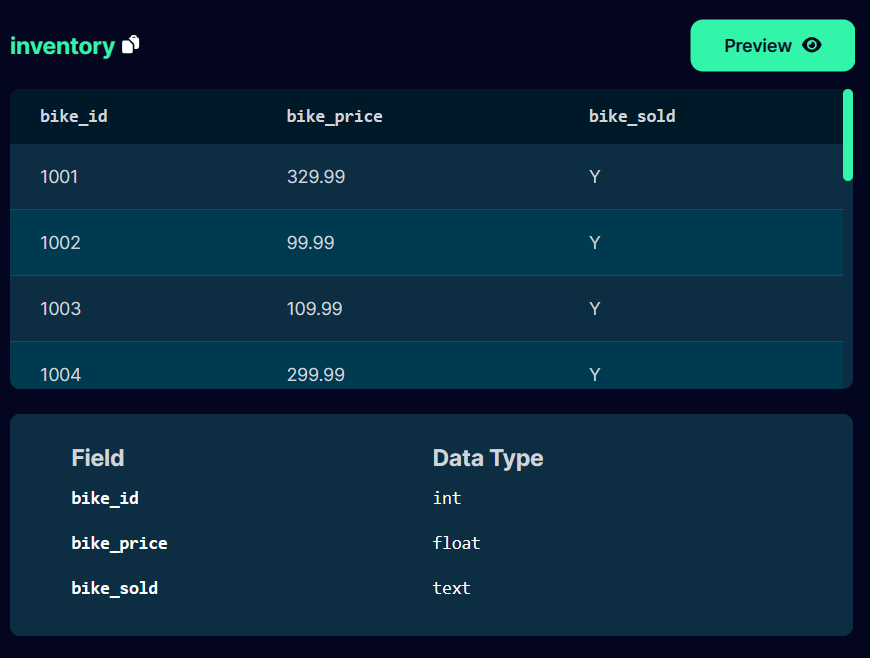

In [ ]:
-- Wrote a query the round the answer to 2 decimal places
SELECT  ROUND(AVG(bike_price),2) AS avg_sale_price
  FROM inventory 
Where bike_sold = 'Y' AND bike_price IS NOT NULL;

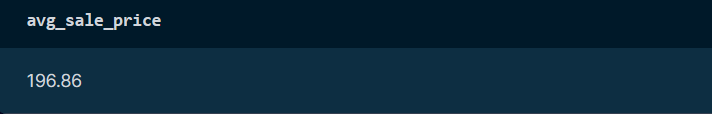

# Business Problem

**Senior Citizen Discount**

If a customer is 55 or above they qualify for the senior citizen discount. Check which customers qualify.

Assume the current date 1/1/2023.

Return all of the Customer IDs who qualify for the senior citizen discount in ascending order.

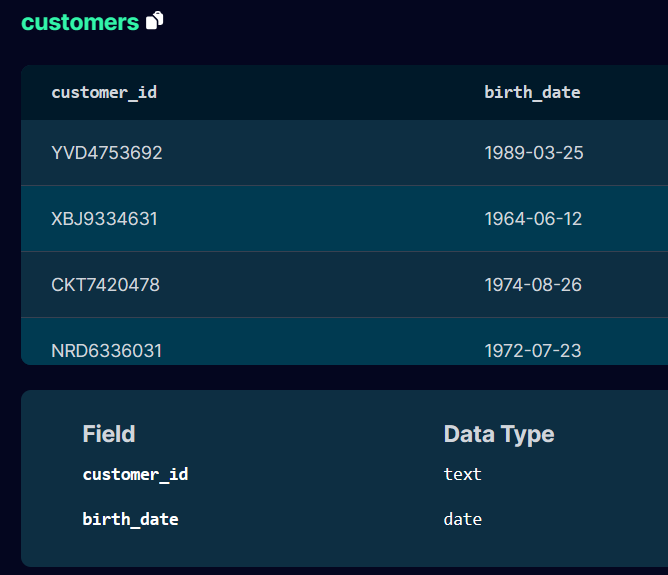

In [ ]:
-- Wrote a query using TimeStampDiff to calculate customer_id with age of 55 or older based on their birthdate
SELECT customer_id 
FROM customers 
WHERE TIMESTAMPDIFF(YEAR, birth_date, '2023-01-01') >= 55
ORDER BY customer_id asc;

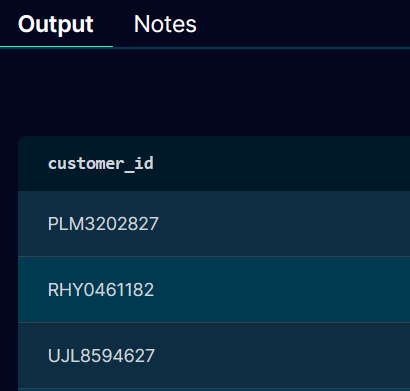

**Learned TIMESTAMPDIFF and how to use it to calculate a customer's age based on their birthdate and filter customers 55 or older.**

# Business Problem: 

**Kroger's Members**

Kroger's is a very popular grocery chain in the US. They offer a membership card in exchange for a discount on select items. Customers can still shop at Krogers without the card.

Write a query to find the percentage of customers who shop at Kroger's who also have a Kroger's membership card. Round to 2 decimal places.

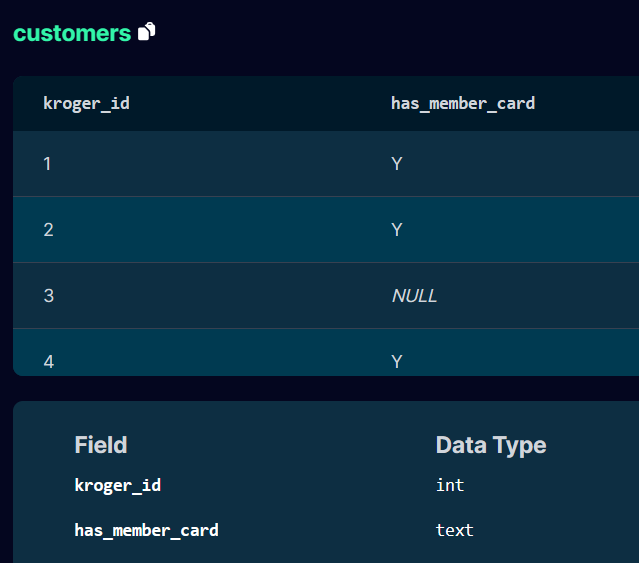

In [ ]:
-- used a CASE expression to find the number of customers who have a Kroger's membership card.
SELECT ROUND(SUM(CASE WHEN has_member_card = 'Y' THEN 1 END) 
  / COUNT(kroger_id) * 100, 2) AS percentage
FROM customers;

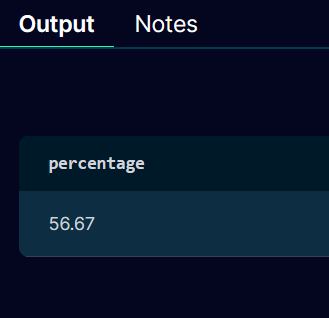

# Business Problem

**Food Divides Us**

In the United States, fast food is the cornerstone of it's very society. Without it, it would cease to exist.

But which region spends the most money on fast food?

Write a query to determine which region spends the most amount of money on fast food.

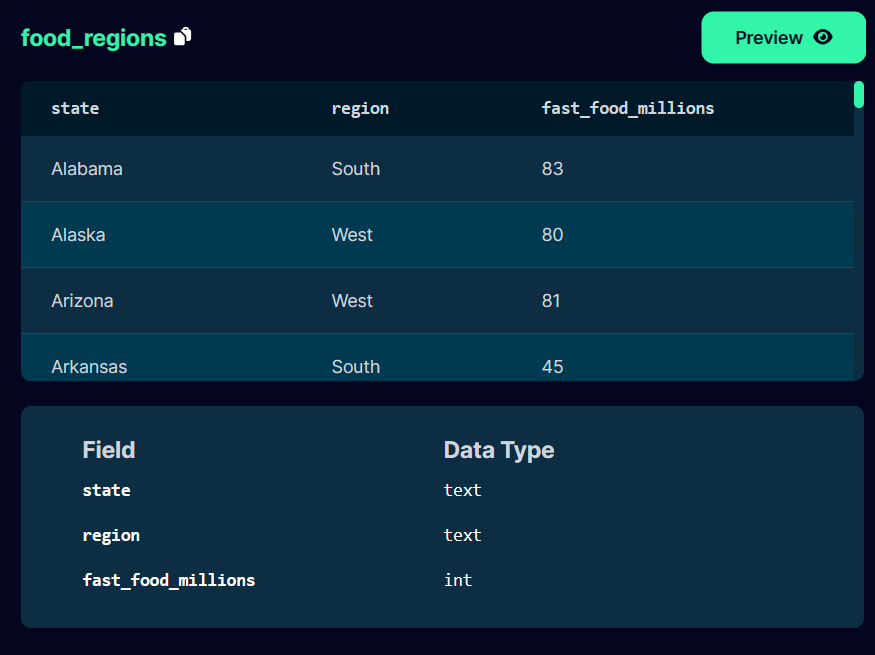

In [ ]:
-- solved the problem using a CTE
WITH food_regions_grouped AS (
SELECT region, SUM(fast_food_millions) AS total_spending
FROM food_regions 
GROUP BY region
ORDER BY total_spending DESC
LIMIT 1)
SELECT region 
  FROM food_regions_grouped;

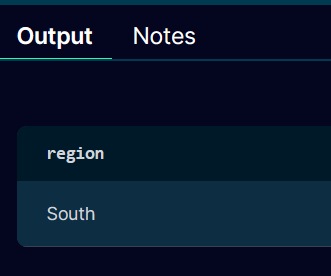

# Business Problem: 

**Tech Layoffs**

Tech companies have been laying off employees after a large surge of hires in the past few years.

Write a query to determine the percentage of employees that were laid off from each company.

Output should include the company and the percentage (to 2 decimal places) of laid off employees.

Order by company name alphabetically.

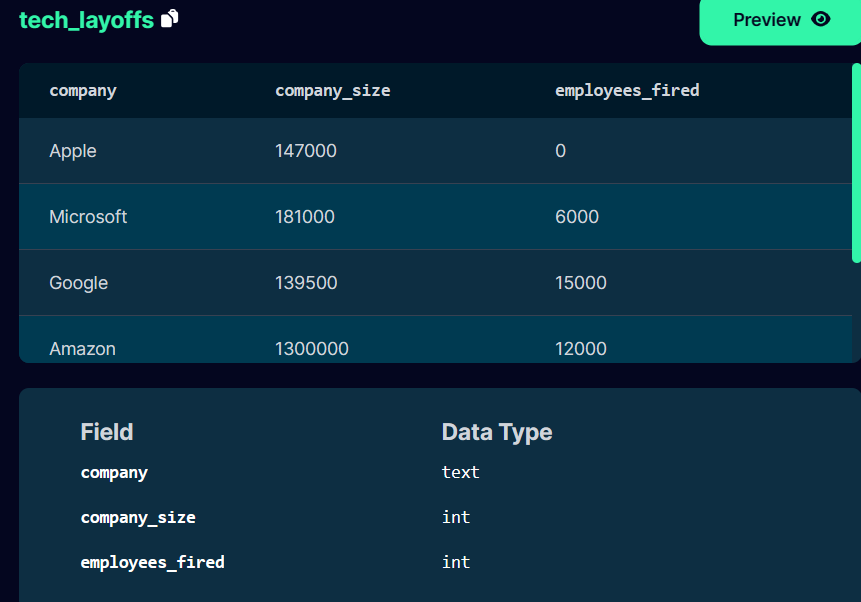

In [ ]:
-- Calculated the percentage of employees laid off by dividing employees_fired and company size
SELECT company, ROUND(employees_fired / company_size * 100, 2) AS percentage
FROM tech_layoffs 
ORDER BY company asc;

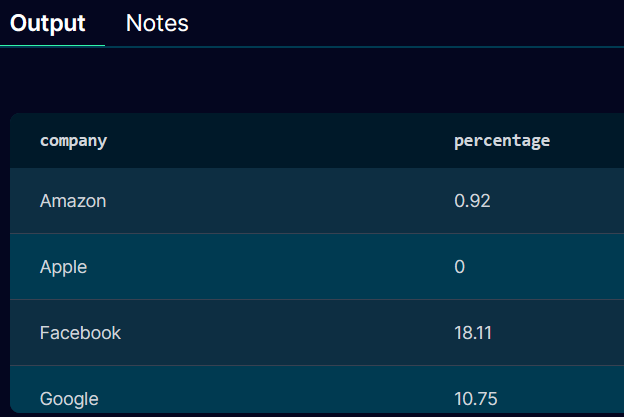

# Business Problem:

**LinkedIn Famous**

Write a query to determine the popularity of a post on LinkedIn

Popularity is defined by number of actions (likes, comments, shares, etc.) divided by the number impressions the post received * 100.

If the post receives a score higher than 1 it was very popular.

Return all the post IDs and their popularity where the score is 1 or greater.

Order popularity from highest to lowest.

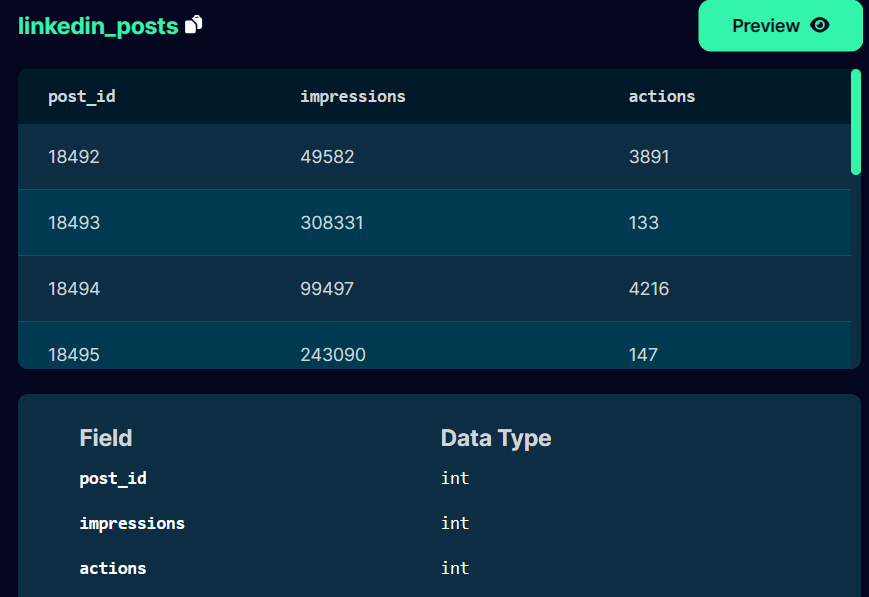

In [ ]:
SELECT post_id, 
  actions / impressions * 100 as popularity
FROM linkedin_posts 
WHERE (actions / impressions * 100) >= 1
ORDER BY popularity DESC;

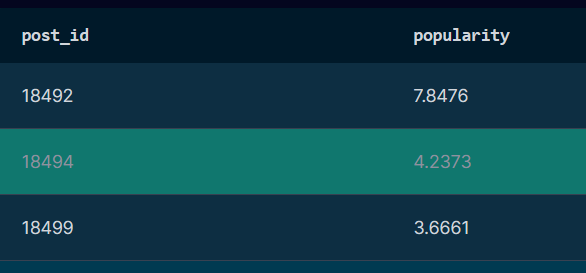

# Business Problem:

**Cake vs Pie**

Marcie's Bakery is having a contest at her store. Whichever dessert sells more each day will be on discount tomorrow. She needs to identify which dessert is selling more.

Write a query to report the difference between the number of Cakes and Pies sold each day.

Output should include the date sold, the difference between cakes and pies, and which one sold more (cake or pie). The difference should be a positive number.

Return the result table ordered by Date_Sold.

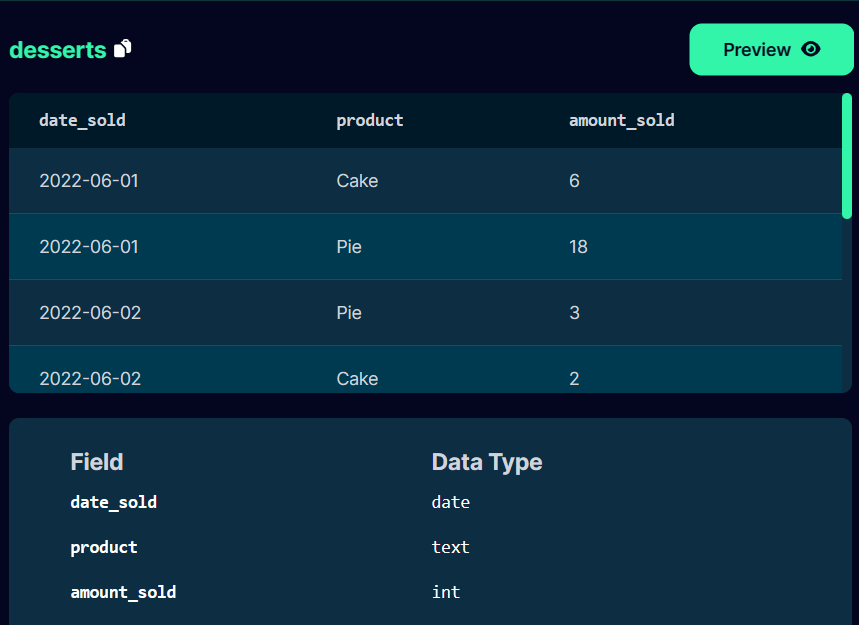

In [ ]:
- Used ABS to returne a positive number when calculating the difference of cake vs. pies
SELECT date_sold, 
ABS(SUM(CASE WHEN product = 'Cake' THEN amount_sold ELSE 0 END) -
  SUM(CASE WHEN product = 'Pie' THEN amount_sold ELSE 0 END)) AS difference,
CASE
  WHEN SUM(CASE WHEN product = 'Cake' THEN amount_sold ELSE 0 END) >
  SUM(CASE WHEN product = 'Pie' THEN amount_sold ELSE 0 END)
  THEN 'Cake'
  WHEN SUM(CASE WHEN product = 'Cake' THEN amount_sold ELSE 0 END) = 
  SUM(CASE WHEN product = 'Pie' THEN amount_sold ELSE 0 END)
  THEN NULL
  ELSE 'Pie'
END AS sold_more
FROM desserts
GROUP BY date_sold
ORDER BY date_sold;

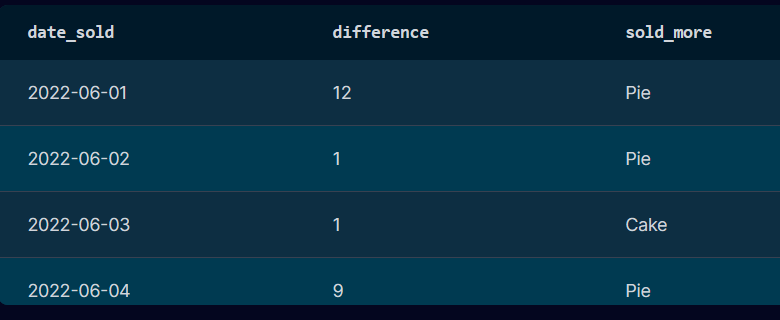

Queries:

    self join
    substring_index
    Round
    TIMESTAMPDIFF
    CASE Expression
    CTE
    ABS
    